In [1]:
# 1. Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [3]:
# 2. Carga del dataset
df = pd.read_csv(r"C:/Users/cecil/Downloads/diabetes.csv")

# Variable objetivo correcta en este dataset
y = df["Outcome"]

# Variables predictoras (todas menos el target)
X = df.drop(["Outcome"], axis=1)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# 3. División de datos

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
# 4. Pipeline del modelo

pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("ridge", Ridge())
])


In [6]:
# 5. GridSearchCV para optimizar alpha

param_grid = {
    "ridge__alpha": [0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

grid.fit(X_train, y_train)

,estimator,"Pipeline(step...e', Ridge())])"
,param_grid,"{'ridge__alpha': [0.01, 0.1, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,missing_values,nan


In [7]:
# 6. Mejor modelo encontrado
best_model = grid.best_estimator_
best_alpha = grid.best_params_

print("Mejor alpha encontrado:", best_alpha)

Mejor alpha encontrado: {'ridge__alpha': 10}


In [8]:
# 7. Predicciones del modelo

y_pred = best_model.predict(X_test)

In [9]:
# 8. Evaluación del modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 0.41314015823291184
R²: 0.25657291316523934


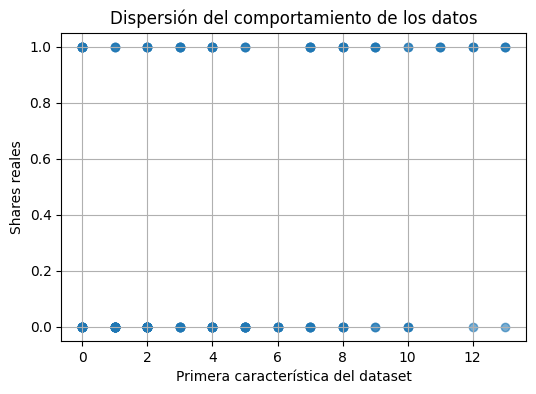

In [10]:
# 9. Gráfica de dispersión (comportamiento de los datos)
plt.figure(figsize=(6, 4))
plt.scatter(X_test.iloc[:, 0], y_test, alpha=0.6)
plt.xlabel("Primera característica del dataset")
plt.ylabel("Shares reales")
plt.title("Dispersión del comportamiento de los datos")
plt.grid(True)
plt.show()


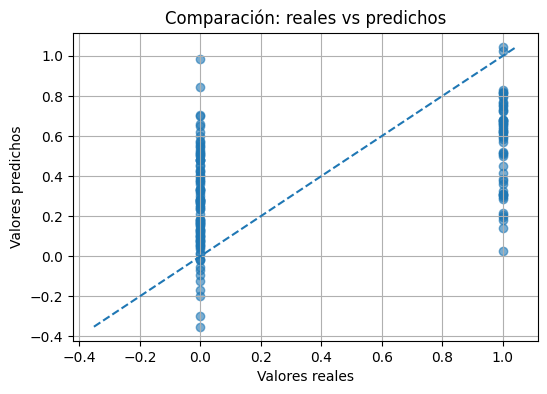

In [12]:
# 10. Gráfica de valores reales vs valores predichos
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Comparación: reales vs predichos")
plt.grid(True)

# Opcional: línea ideal
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--")
plt.show()